# 4.4 Overfitting and underfitting

In all three examples in the previous chapter—predicting movie reviews, topic classification,
and house-price regression—the performance of the model on the held-out
validation data always peaked after a few epochs and then began to degrade: the
model quickly started to overfit to the training data. Overfitting happens in every
machine-learning problem. Learning how to deal with overfitting is essential to mastering
machine learning.

The fundamental issue in machine learning is the tension between optimization
and generalization. Optimization refers to the process of adjusting a model to get the
best performance possible on the training data (the learning in machine learning),
whereas generalization refers to how well the trained model performs on data it has
never seen before. The goal of the game is to get good generalization, of course, but
you don’t control generalization; you can only adjust the model based on its training
data.

At the beginning of training, optimization and generalization are correlated: the
lower the loss on training data, the lower the loss on test data. While this is happening,
your model is said to be underfit: there is still progress to be made; the network hasn’t
yet modeled all relevant patterns in the training data. But after a certain number of
iterations on the training data, generalization stops improving, and validation metrics
stall and then begin to degrade: the model is starting to overfit. That is, it’s beginning
to learn patterns that are specific to the training data but that are misleading or irrelevant
when it comes to new data.

To prevent a model from learning misleading or irrelevant patterns found in the
training data, __the best solution is to get more training data__. A model trained on more data
will naturally generalize better. When that isn’t possible, the next-best solution is to
modulate the quantity of information that your model is allowed to store or to add
constraints on what information it’s allowed to store. If a network can only afford to
memorize a small number of patterns, the optimization process will force it to focus
on the most prominent patterns, which have a better chance of generalizing well.

The processing of fighting overfitting this way is called regularization. Let’s review
some of the most common regularization techniques and apply them in practice to
improve the movie-classification model from section 3.4.

## 4.4.1 Reducing the network’s size

The simplest way to prevent overfitting is to reduce the size of the model: the number
of learnable parameters in the model (which is determined by the number of layers
and the number of units per layer). In deep learning, the number of learnable parameters
in a model is often referred to as the model’s capacity. Intuitively, a model with
more parameters has more memorization capacity and therefore can easily learn a perfect
dictionary-like mapping between training samples and their targets—a mapping
without any generalization power. For instance, a model with 500,000 binary parameters
could easily be made to learn the class of every digit in the MNIST training set: we’d need only 10 binary parameters for each of the 50,000 digits. But such a model
would be useless for classifying new digit samples. Always keep this in mind: deeplearning
models tend to be good at fitting to the training data, but the real challenge
is generalization, not fitting.

On the other hand, if the network has limited memorization resources, it won’t be
able to learn this mapping as easily; thus, in order to minimize its loss, it will have to
resort to learning compressed representations that have predictive power regarding
the targets—precisely the type of representations we’re interested in. At the same
time, keep in mind that you should use models that have enough parameters that they
don’t underfit: your model shouldn’t be starved for memorization resources. There is
a compromise to be found between too much capacity and not enough capacity.

Unfortunately, there is no magical formula to determine the right number of layers
or the right size for each layer. You must evaluate an array of different architectures
(on your validation set, not on your test set, of course) in order to find the
correct model size for your data. The general workflow to find an appropriate model
size is to start with relatively few layers and parameters, and increase the size of the layers
or add new layers until you see diminishing returns with regard to validation loss.

Let’s try this on the movie-review classification network. The original network is
shown next.

In [1]:
# Original model
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


Now let’s try to replace it with this smaller network.

In [2]:
# Version of the model with lower capacity
model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

The next figure shows a comparison of the validation losses of the original network and the
smaller network. The dots are the validation loss values of the smaller network, and
the crosses are the initial network (remember, a lower validation loss signals a better
model).

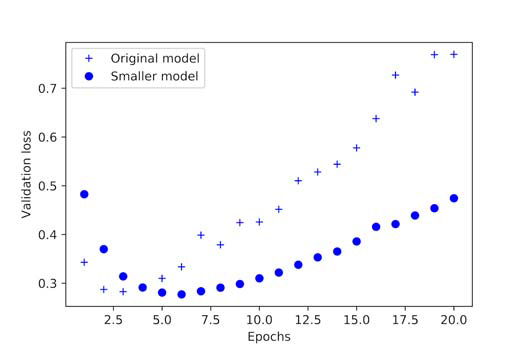

As you can see, the smaller network starts overfitting later than the reference network
(after six epochs rather than four), and its performance degrades more slowly once it
starts overfitting.

Now, for kicks, let’s add to this benchmark a network that has much more capacity—
far more than the problem warrants.

In [3]:
# Version of the model with higher capacity
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

The next figure shows how the bigger network fares compared to the reference network.
The dots are the validation loss values of the bigger network, and the crosses are the
initial network.

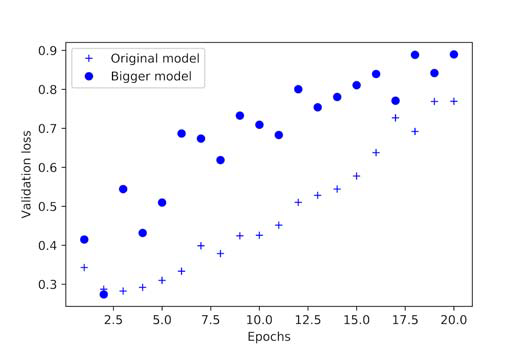

The bigger network starts overfitting almost immediately, after just one epoch, and it
overfits much more severely. Its validation loss is also noisier.

Meanwhile, figure below shows the training losses for the two networks. As you can
see, the bigger network gets its training loss near zero very quickly. The more capacity
the network has, the more quickly it can model the training data (resulting in a low
training loss), but the more susceptible it is to overfitting (resulting in a large difference
between the training and validation loss).
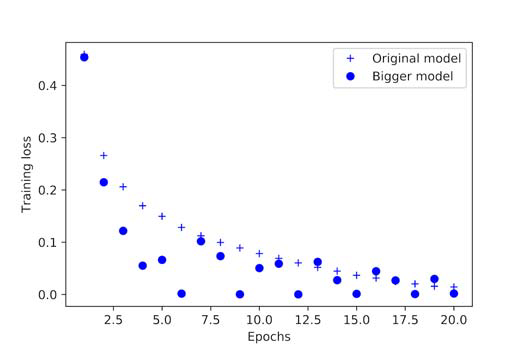

## 4.4.2 Adding weight regularization

You may be familiar with the principle of Occam’s razor: given two explanations for
something, the explanation most likely to be correct is the simplest one—the one that
makes fewer assumptions. This idea also applies to the models learned by neural net-
works: given some training data and a network architecture, multiple sets of weight
values (multiple models) could explain the data. Simpler models are less likely to over-
fit than complex ones.

A simple model in this context is a model where the distribution of parameter values
has less entropy (or a model with fewer parameters, as you saw in the previous sec-
tion). Thus a common way to mitigate overfitting is to put constraints on the complex-
ity of a network by forcing its weights to take only small values, which makes the
distribution of weight values more regular. This is called weight regularization, and it’s
done by adding to the loss function of the network a cost associated with having large
weights. This cost comes in two flavors:
* __L1 regularization__—The cost added is proportional to the absolute value of the weight coefficients (the L1 norm of the weights).
* __L2 regularization__—The cost added is proportional to the square of the value of the weight coefficients (the L2 norm of the weights). L2 regularization is also called weight decay in the context of neural networks. Don’t let the different name confuse you: weight decay is mathematically the same as L2 regularization.

In Keras, weight regularization is added by passing weight regularizer instances to layers
as keyword arguments. Let’s add L2 weight regularization to the movie-review classifi-
cation network.

In [4]:
# Adding L2 weight regularization to the model
from keras import regularizers
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 *
weight_coefficient_value to the total loss of the network. Note that because this
penalty is only added at training time, the loss for this network will be much higher at
training than at test time.

Figure below shows the impact of the L2 regularization penalty. As you can see, the
model with L2 regularization (dots) has become much more resistant to overfitting
than the reference model (crosses), even though both models have the same number
of parameters.

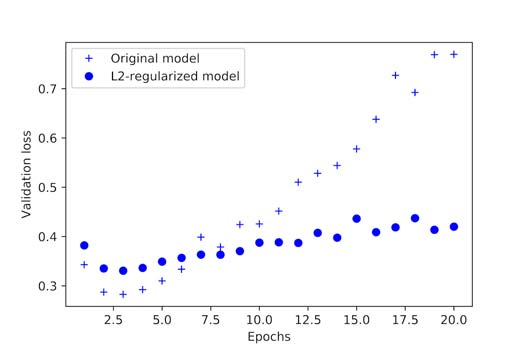

As an alternative to L2 regularization, you can use one of the following Keras weight
regularizers.

In [5]:
# Different weight regularizers available in Keras
from keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

## 4.4.3 Adding dropout

Dropout is one of the most effective and most commonly used regularization tech-
niques for neural networks, developed by Geoff Hinton and his students at the Uni-
versity of Toronto. Dropout, applied to a layer, consists of randomly dropping out
(setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input
sample during training. After applying dropout, this vector will have a few zero entries
distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction
of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no
units are dropped out; instead, the layer’s output values are scaled down by a factor
equal to the dropout rate, to balance for the fact that more units are active than at
training time.

Consider a Numpy matrix containing the output of a layer, layer_output , of
shape (batch_size, features) . At training time, we zero out at random a fraction of
the values in the matrix:

layer_output *= np.random.randint(0, high=2, size=layer_output.shape)

At test time, we scale down the output by the dropout rate. Here, we scale by 0.5
(because we previously dropped half the units):

layer_output *= 0.5

Note that this process can be implemented by doing both operations at training time
and leaving the output unchanged at test time, which is often the way it’s imple-
mented in practice

layer_output *= np.random.randint(0, high=2, size=layer_output.shape)
layer_output /= 0.5

This technique may seem strange and arbitrary. Why would this help reduce overfitting? Hinton says he was inspired by, among other things, a fraud-prevention mechanism used by banks. In his own words, “I went to my bank. The tellers kept changing
and I asked one of them why. He said he didn’t know but they got moved around a lot.
I figured it must be because it would require cooperation between employees to suc-
cessfully defraud the bank. This made me realize that randomly removing a different
subset of neurons on each example would prevent conspiracies and thus reduce over-
fitting.” 1 The core idea is that introducing noise in the output values of a layer can
break up happenstance patterns that aren’t significant (what Hinton refers to as con-
spiracies), which the network will start memorizing if no noise is present.

In Keras, you can introduce dropout in a network via the Dropout layer, which is
applied to the output of the layer right before it:

model.add(layers.Dropout(0.5))

Let’s add two Dropout layers in the IMDB network to see how well they do at reducing
overfitting.

In [7]:
# Adding dropout to the IMDB network

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Figure below shows a plot of the results. Again, this is a clear improvement over the reference network.

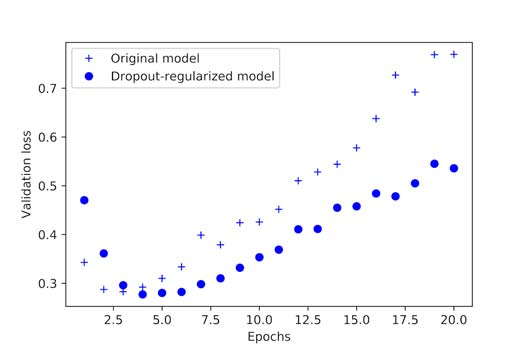

To recap, these are the most common ways to prevent overfitting in neural networks:
* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.

See the Reddit thread “AMA: We are the Google Brain team. We’d love to answer your questions about
machine learning,” http://mng.bz/XrsS.